В домашнем задании нужно сократить число цветов в палитре изображения. 

Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.




In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import skimage
import numpy as np
import pandas as pd
from pylab import rcParams

rcParams['figure.figsize'] = (10,10)

In [2]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

a) Для отображения картинки воспользуйтесь вспомогательной функцией:

b) Для загрузки картинки можно использовать код:

img = cv.imread(path)

In [3]:
img_path = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/13.Clusterization/01.jpg'
geo_comment_path = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/13.Clusterization/geo_comment.xlsx'

In [4]:
img = cv2.imread(img_path)

In [5]:
b, g, r = cv2.split(img)

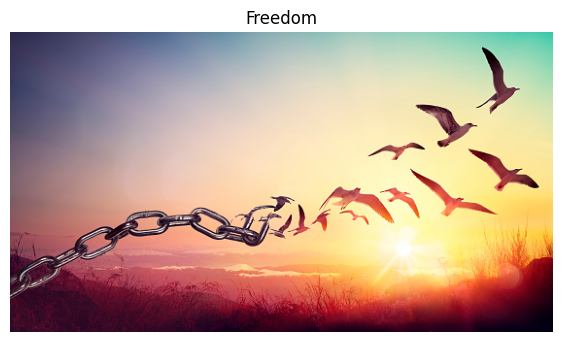

In [6]:
draw_picture(img, 'Freedom')

Реализуйте три модели кластеризации:

a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

b) DBSCAN

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from skimage.metrics import structural_similarity as ssim

In [8]:
def run(clusterization, img):
    img_data = np.copy(img).reshape(-1, 3)
    clusters = clusterization.fit_predict(img_data)
    for i, x in enumerate(np.unique(clusters)):
        current_cluster = img_data[clusters == x]
        img_data[clusters == x] = np.mean(current_cluster, axis=0)
    new_img = img_data.reshape(img.shape)
    plt.figure(figsize=(10, 10))
    plt.title('clusters = {}'.format(len(np.unique(clusters))))
    plt.imshow(new_img)
    plt.show()
    return new_img, ssim(img, new_img, channel_axis=2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


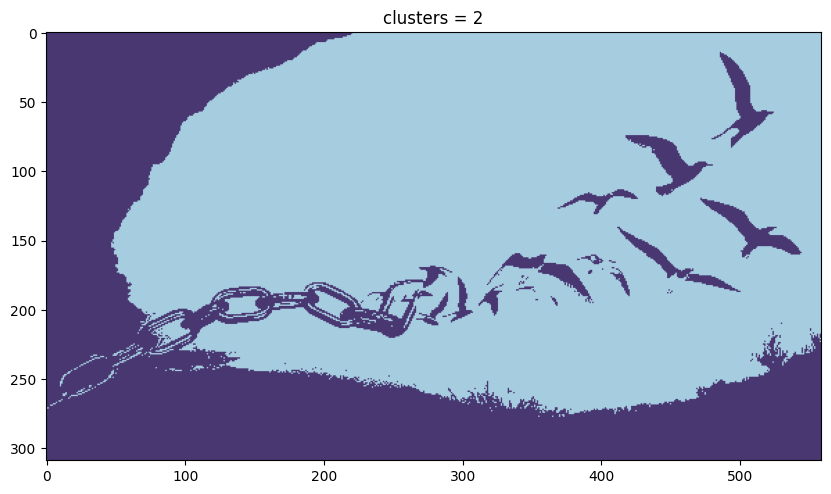


SSIM = 0.749



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


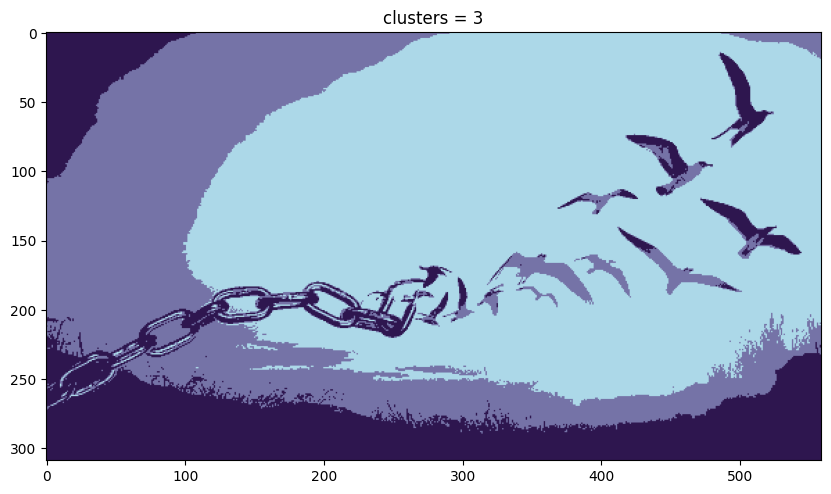


SSIM = 0.790



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


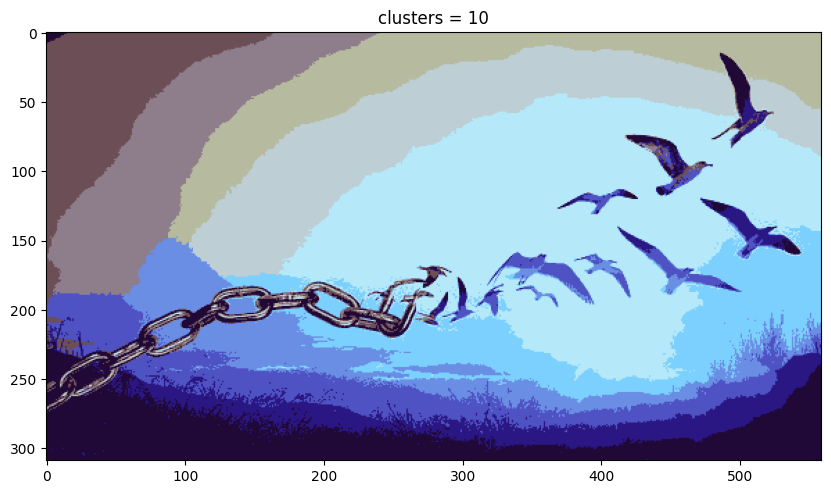


SSIM = 0.815



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


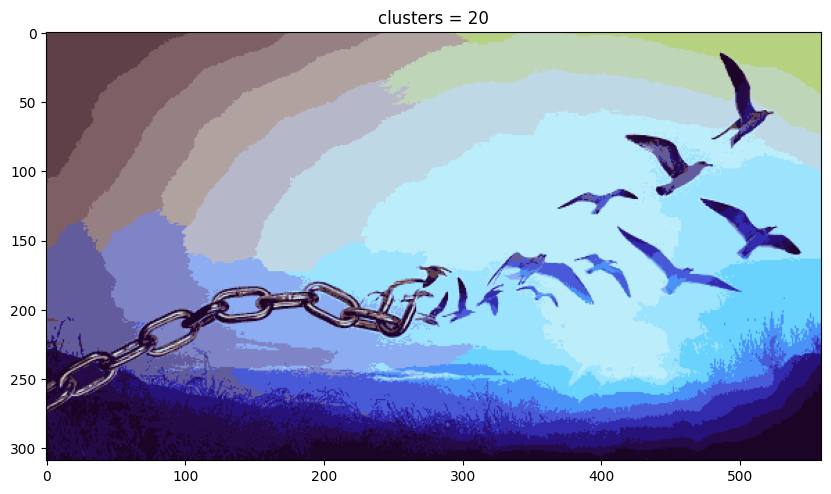


SSIM = 0.835



In [9]:
K = [2, 3, 10, 20]
for k in K:
    print ('\nSSIM = {:.3f}\n'.format(run(KMeans(n_clusters=k), img)[1]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


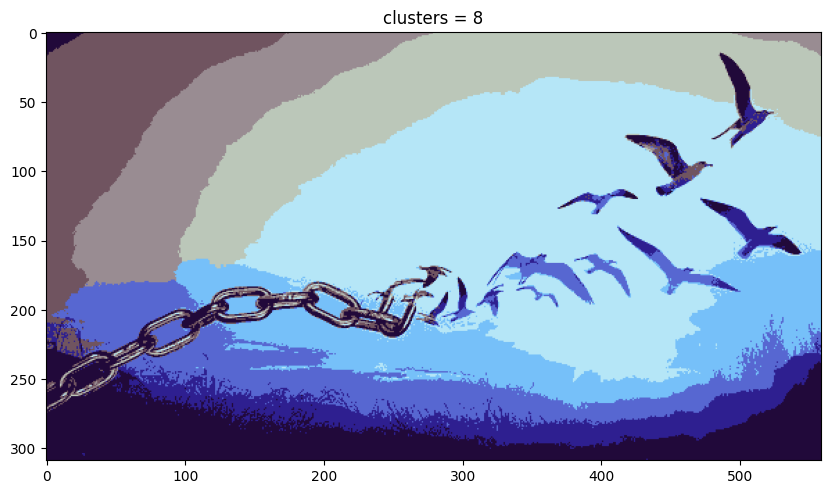


SSIM = 0.808



In [10]:
print ('\nSSIM = {:.3f}\n'.format(run(KMeans(), img)[1]))

In [11]:
# print ('\nSSIM = {:.3f}\n'.format(run(AgglomerativeClustering(n_clusters=2), img)[1]))    # Не хватает мощности ОЗУ для проверки

Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

Сформулируйте выводы по проделанной работе.

a) Какая модель показала лучший результат?

Наилучший результат показала модель KMeans с количеством кластеров 20